# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Generate the Cities List by Using the citipy Library

# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make the API request
        response = requests.get(city_url)
        
        # If the response is successful (status code 200)
        if response.status_code == 200:
            # Parse the JSON and retrieve data
            city_weather = response.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            city_date = city_weather["dt"]

            # Append the City information into city_data list
            city_data.append({"City": city, 
                              "Lat": city_lat, 
                              "Lng": city_lng, 
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})
        else:
            # If the response is not successful, print an error message
            print(f"City not found: {city}. Skipping...")
    
    # If an error is experienced, skip the city
    except Exception as e:
        print(f"An error occurred while processing {city}: {str(e)}. Skipping...")

# Indicate that Data Retrieval is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | tolanaro
Processing Record 3 of Set 1 | puerto baquerizo moreno
Processing Record 4 of Set 1 | wailua homesteads
Processing Record 5 of Set 1 | cable beach
City not found: cable beach. Skipping...
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | hamilton
Processing Record 9 of Set 1 | taiohae
City not found: taiohae. Skipping...
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | gueckedou
Processing Record 12 of Set 1 | lappeenranta
Processing Record 13 of Set 1 | talnakh
Processing Record 14 of Set 1 | olonkinbyen
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | iskateley
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | pahrump
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | madimb

In [6]:
# Convert the city_data list to a DataFrame
city_data_df = pd.DataFrame(city_data)

# Display the DataFrame
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,20.71,78,100,9.34,PN,1721128522
1,tolanaro,-25.0319,46.9987,23.70,64,0,2.52,MG,1721128523
2,puerto baquerizo moreno,-0.9000,-89.6000,21.27,84,37,4.93,EC,1721128523
3,wailua homesteads,22.0669,-159.3780,24.24,81,100,7.20,US,1721128523
4,yellowknife,62.4560,-114.3525,18.29,68,75,6.71,CA,1721128523


In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,20.71,78,100,9.34,PN,1721128522
1,tolanaro,-25.0319,46.9987,23.70,64,0,2.52,MG,1721128523
2,puerto baquerizo moreno,-0.9000,-89.6000,21.27,84,37,4.93,EC,1721128523
3,wailua homesteads,22.0669,-159.3780,24.24,81,100,7.20,US,1721128523
4,yellowknife,62.4560,-114.3525,18.29,68,75,6.71,CA,1721128523


In [9]:
# Export the City_Data into a csv
# Save the DataFrame to a CSV file
city_data_df.to_csv("city_data.csv", index=False)


In [11]:
# Read saved data
file_path = r"C:\Users\admin\Desktop\2024\Data-Analyst\Assignments\Api_challenge\python_api_challenge\Starter_Code\WeatherPy\city_data.csv"
city_data_df = pd.read_csv(file_path, index_col="City")



# Display sample data
city_data_df.head()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,
adamstown,-25.0660,-130.1015,20.71,78,100,9.34,PN,1721128522
tolanaro,-25.0319,46.9987,23.70,64,0,2.52,MG,1721128523
puerto baquerizo moreno,-0.9000,-89.6000,21.27,84,37,4.93,EC,1721128523
wailua homesteads,22.0669,-159.3780,24.24,81,100,7.20,US,1721128523
yellowknife,62.4560,-114.3525,18.29,68,75,6.71,CA,1721128523


In [12]:
# Read saved data
city_data_df = pd.read_csv("city_data.csv", index_col="City")

# Display sample data
city_data_df.head()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,
adamstown,-25.0660,-130.1015,20.71,78,100,9.34,PN,1721128522
tolanaro,-25.0319,46.9987,23.70,64,0,2.52,MG,1721128523
puerto baquerizo moreno,-0.9000,-89.6000,21.27,84,37,4.93,EC,1721128523
wailua homesteads,22.0669,-159.3780,24.24,81,100,7.20,US,1721128523
yellowknife,62.4560,-114.3525,18.29,68,75,6.71,CA,1721128523


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

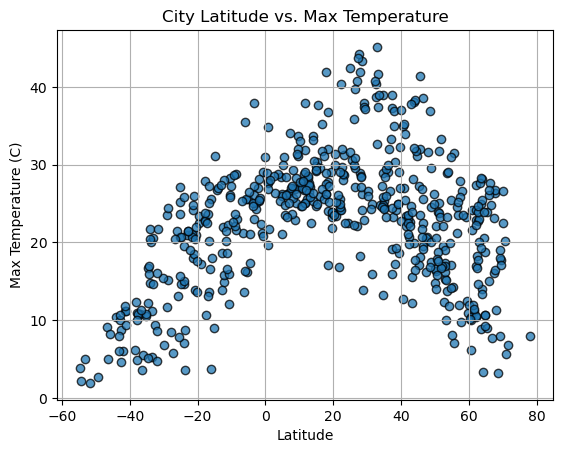

In [35]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig(r"C:\Users\admin\Desktop\2024\Data-Analyst\Assignments\Api_challenge\python_api_challenge\Starter_Code\output_data\Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

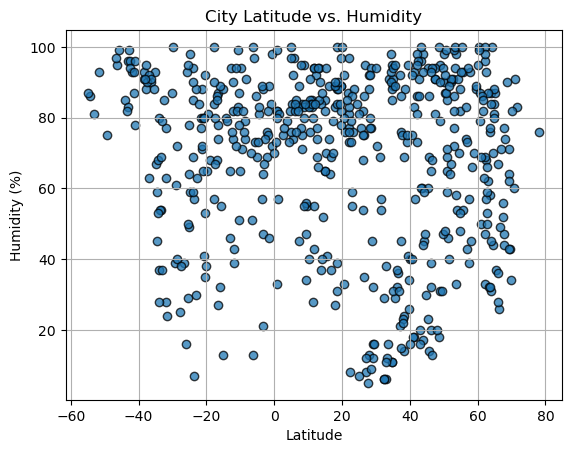

In [14]:
import matplotlib.pyplot as plt

# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig(r"C:\Users\admin\Desktop\2024\Data-Analyst\Assignments\Api_challenge\python_api_challenge\Starter_Code\output_data\Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

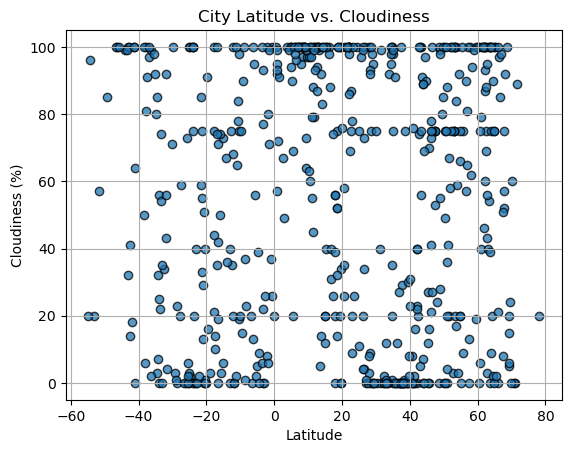

In [15]:
import matplotlib.pyplot as plt

# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig(r"C:\Users\admin\Desktop\2024\Data-Analyst\Assignments\Api_challenge\python_api_challenge\Starter_Code\output_data\Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

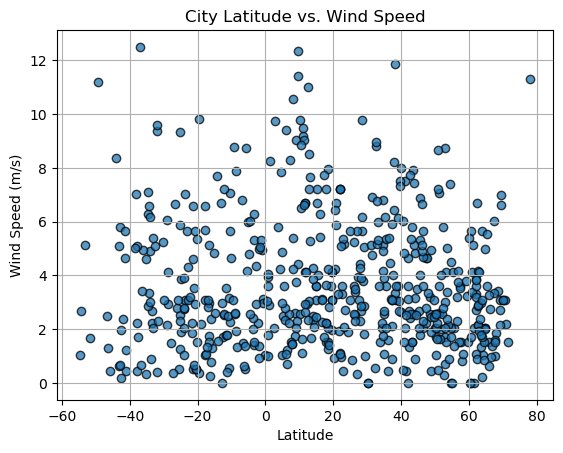

In [17]:
import matplotlib.pyplot as plt

# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig(r"C:\Users\admin\Desktop\2024\Data-Analyst\Assignments\Api_challenge\python_api_challenge\Starter_Code\output_data\Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [36]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, save_path=None):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    # Create scatter plot and regression line
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the plot with the regression equation
    plt.annotate(line_eq, (min(x_values), min(regress_values)), fontsize=15, color="red")
    
    # Incorporate other graph properties
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    
    # Save the figure if save_path is provided
    if save_path:
        plt.savefig(save_path)
    
    # Show plot
    plt.show()


In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,
wailua homesteads,22.0669,-159.3780,24.24,81,100,7.20,US,1721128523
yellowknife,62.4560,-114.3525,18.29,68,75,6.71,CA,1721128523
hamilton,39.1834,-84.5333,24.98,73,0,3.60,US,1721128523
tiksi,71.6872,128.8694,6.80,83,89,1.52,RU,1721128524
gueckedou,8.6667,-10.2500,22.84,95,100,2.60,GN,1721128524


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,
adamstown,-25.0660,-130.1015,20.71,78,100,9.34,PN,1721128522
tolanaro,-25.0319,46.9987,23.70,64,0,2.52,MG,1721128523
puerto baquerizo moreno,-0.9000,-89.6000,21.27,84,37,4.93,EC,1721128523
edinburgh of the seven seas,-37.0676,-12.3116,10.79,63,97,12.50,SH,1721128523
waitangi,-43.9535,-176.5597,10.46,85,99,8.36,NZ,1721128525


###  Temperature vs. Latitude Linear Regression Plot

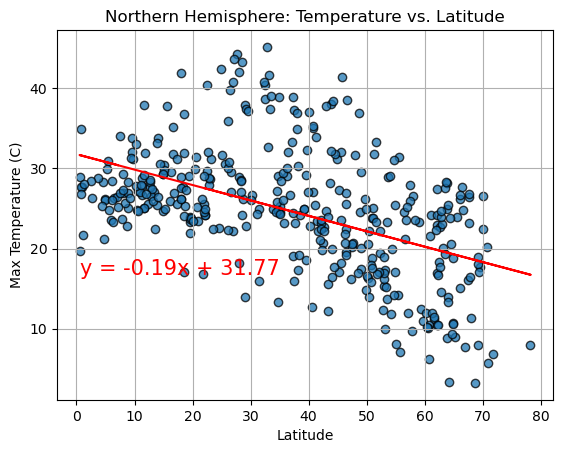

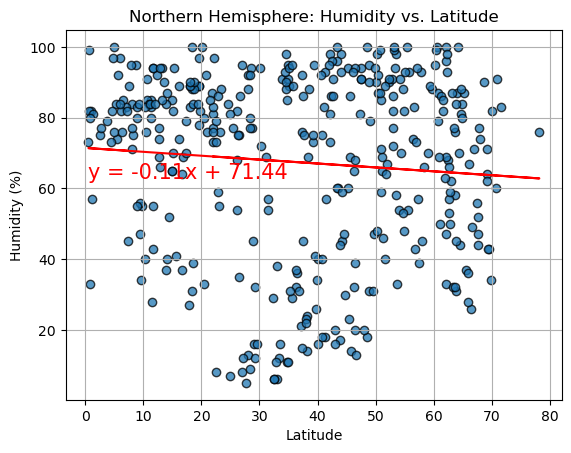

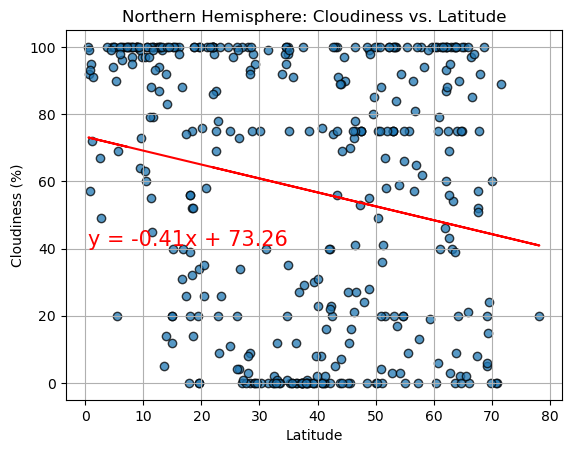

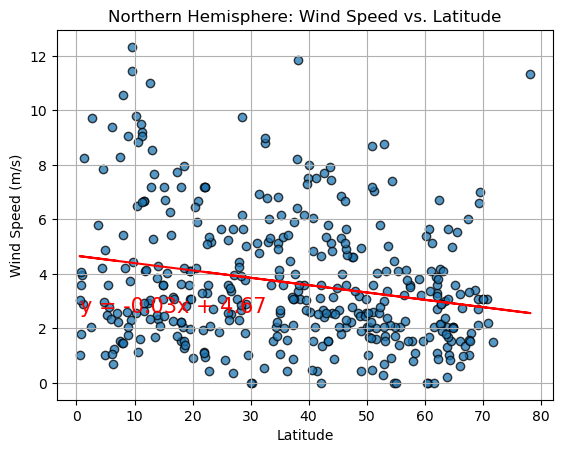

In [23]:
# Import necessary libraries
import os
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd

# Define the specific output directory path
output_dir = r"C:\Users\admin\Desktop\2024\Data-Analyst\Assignments\Api_challenge\python_api_challenge\Starter_Code\output_data"

# Create output directory if it does not exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define the linear regression plotting function
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, save_path=None):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    # Create scatter plot and regression line
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the plot with the regression equation
    plt.annotate(line_eq, (min(x_values), min(regress_values)), fontsize=15, color="red")
    
    # Incorporate other graph properties
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    
    # Save the figure if save_path is provided
    if save_path:
        plt.savefig(save_path)
    
    # Show plot
    plt.show()

# Assume city_data_df is already created and available
# Read saved data (if not already in the session)
# city_data_df = pd.read_csv("path_to_your_city_data.csv", index_col="City_ID")

# Create DataFrame with Northern Hemisphere data
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Linear Regression: Temperature vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                       "Northern Hemisphere: Temperature vs. Latitude",
                       "Latitude", "Max Temperature (C)",
                       save_path=os.path.join(output_dir, "NH_Temperature_vs_Latitude.png"))

# Linear Regression: Humidity vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       "Northern Hemisphere: Humidity vs. Latitude",
                       "Latitude", "Humidity (%)",
                       save_path=os.path.join(output_dir, "NH_Humidity_vs_Latitude.png"))

# Linear Regression: Cloudiness vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       "Northern Hemisphere: Cloudiness vs. Latitude",
                       "Latitude", "Cloudiness (%)",
                       save_path=os.path.join(output_dir, "NH_Cloudiness_vs_Latitude.png"))

# Linear Regression: Wind Speed vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       "Northern Hemisphere: Wind Speed vs. Latitude",
                       "Latitude", "Wind Speed (m/s)",
                       save_path=os.path.join(output_dir, "NH_WindSpeed_vs_Latitude.png"))


The r-value is: -0.4930259812053312


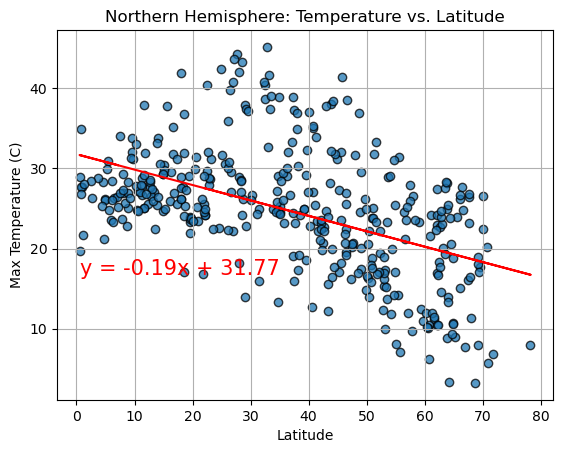

In [29]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                       "Northern Hemisphere: Temperature vs. Latitude",
                       "Latitude", "Max Temperature (C)",
                       save_path=os.path.join(output_dir, "NH_Temperature_vs_Latitude.png"))

The r-value is: 0.7298404989865718


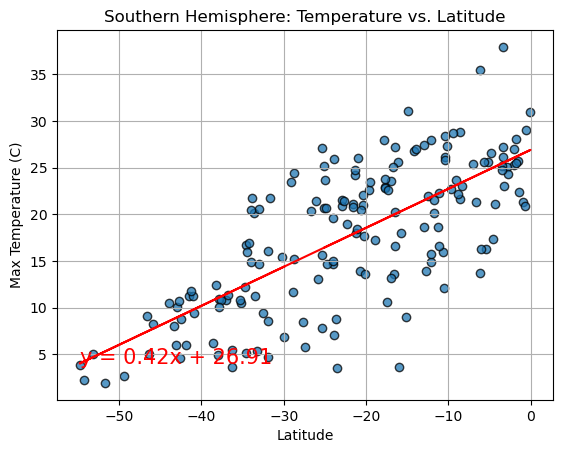

In [30]:

# Linear Regression: for Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       "Southern Hemisphere: Temperature vs. Latitude",
                       "Latitude", "Max Temperature (C)",
                       save_path=os.path.join(output_dir, "SH_Temperature_vs_Latitude.png"))


**Discussion about the linear relationship:** These findings align with the general climatic patterns observed on Earth, where temperatures decrease as one moves away from the equator towards the poles. The high R-values in both cases indicate strong correlations, confirming the significant influence of latitude on temperature distributions globally

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.08469153872313445


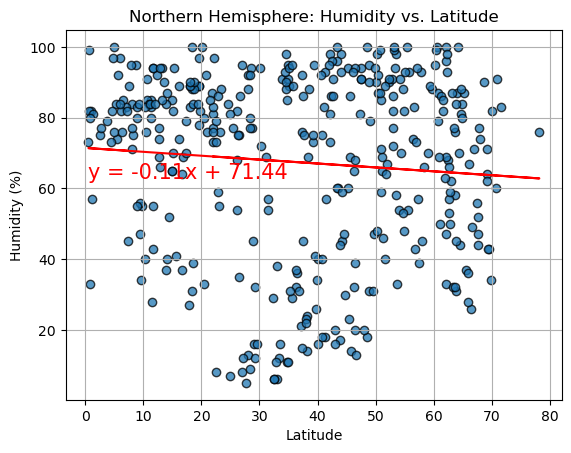

In [27]:
# Import necessary libraries
import os
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Ensure the output directory exists
output_dir = r"C:\Users\admin\Desktop\2024\Data-Analyst\Assignments\Api_challenge\python_api_challenge\Starter_Code\output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define the linear regression plotting function
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, save_path=None):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    # Create scatter plot and regression line
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the plot with the regression equation
    plt.annotate(line_eq, (min(x_values), min(regress_values)), fontsize=15, color="red")
    
    # Incorporate other graph properties
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    
    # Print the R-value
    print(f"The r-value is: {r_value}")

    # Save the figure if save_path is provided
    if save_path:
        plt.savefig(save_path)
    
    # Show plot
    plt.show()

# Create DataFrame with Northern Hemisphere data
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Linear Regression: Humidity vs. Latitude for Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       "Northern Hemisphere: Humidity vs. Latitude",
                       "Latitude", "Humidity (%)",
                       save_path=os.path.join(output_dir, "NH_Humidity_vs_Latitude.png"))


The r-value is: -0.12765826298412186


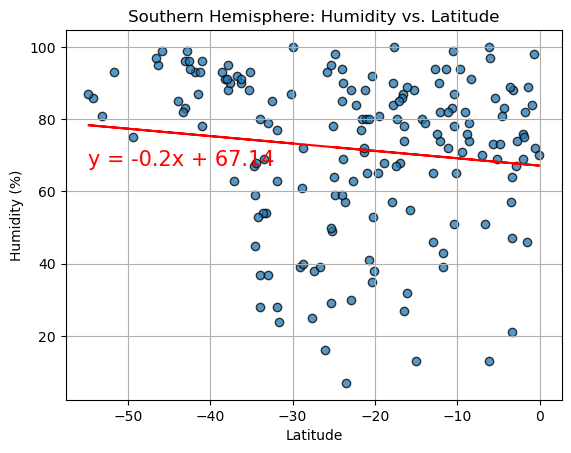

In [28]:
# Import necessary libraries
import os
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Ensure the output directory exists
output_dir = r"C:\Users\admin\Desktop\2024\Data-Analyst\Assignments\Api_challenge\python_api_challenge\Starter_Code\output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define the linear regression plotting function
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, save_path=None):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    # Create scatter plot and regression line
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the plot with the regression equation
    plt.annotate(line_eq, (min(x_values), min(regress_values)), fontsize=15, color="red")
    
    # Incorporate other graph properties
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    
    # Print the R-value
    print(f"The r-value is: {r_value}")

    # Save the figure if save_path is provided
    if save_path:
        plt.savefig(save_path)
    
    # Show plot
    plt.show()

# Create DataFrame with Southern Hemisphere data
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Linear Regression: Humidity vs. Latitude for Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       "Southern Hemisphere: Humidity vs. Latitude",
                       "Latitude", "Humidity (%)",
                       save_path=os.path.join(output_dir, "SH_Humidity_vs_Latitude.png"))


**Discussion about the linear relationship:** The scatter plot and R-value might indicate a weak to moderate linear relationship between humidity and latitude in the Southern Hemisphere. The relationship could be more pronounced than in the Northern Hemisphere but still not very strong.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.2083626785217214


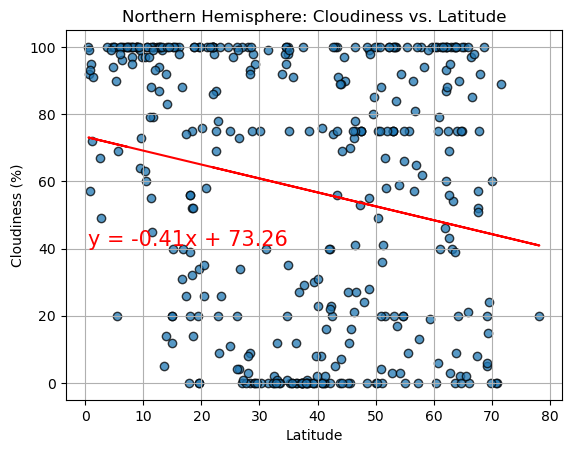

In [31]:
# Northern Hemisphere

plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       "Northern Hemisphere: Cloudiness vs. Latitude",
                       "Latitude", "Cloudiness (%)",
                       save_path=os.path.join(output_dir, "NH_Cloudiness_vs_Latitude.png"))


The r-value is: -0.16042629700817015


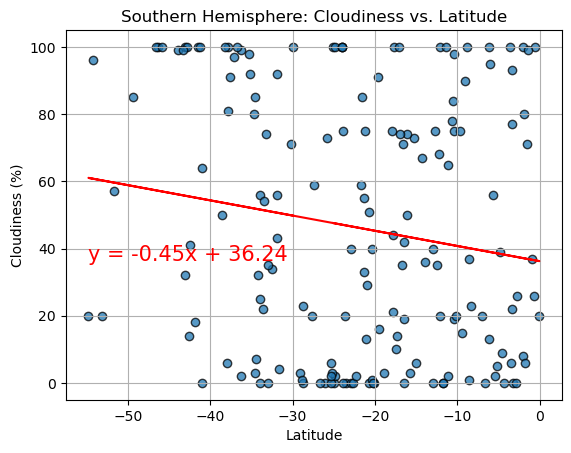

In [32]:
# Southern Hemisphere

plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       "Southern Hemisphere: Cloudiness vs. Latitude",
                       "Latitude", "Cloudiness (%)",
                       save_path=os.path.join(output_dir, "SH_Cloudiness_vs_Latitude.png"))


**Discussion about the linear relationship:** The linear regression analysis of cloudiness vs. latitude for both hemispheres suggests that there is no strong linear relationship between these variables. The R-values likely indicate weak correlations, meaning latitude alone is not a strong predictor of cloudiness levels. Other factors, such as geographical features, local climate conditions, and atmospheric patterns, likely play more significant roles in determining cloudiness levels. This analysis highlights the complexity of climatic variables and the need to consider multiple factors when studying weather patterns and their relationships.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.22411356151332892


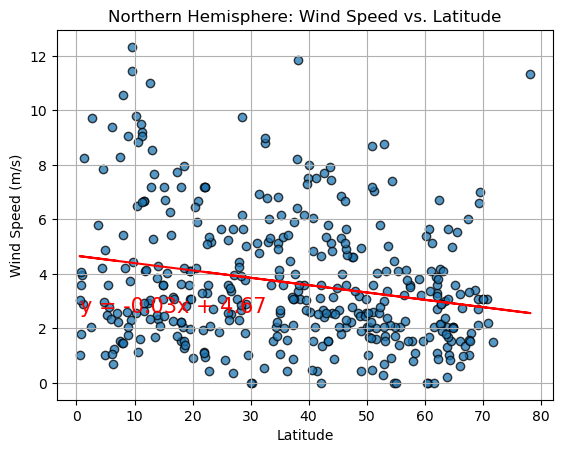

In [33]:
# Northern Hemisphere

plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       "Northern Hemisphere: Wind Speed vs. Latitude",
                       "Latitude", "Wind Speed (m/s)",
                       save_path=os.path.join(output_dir, "NH_WindSpeed_vs_Latitude.png"))


The r-value is: -0.044802611287039856


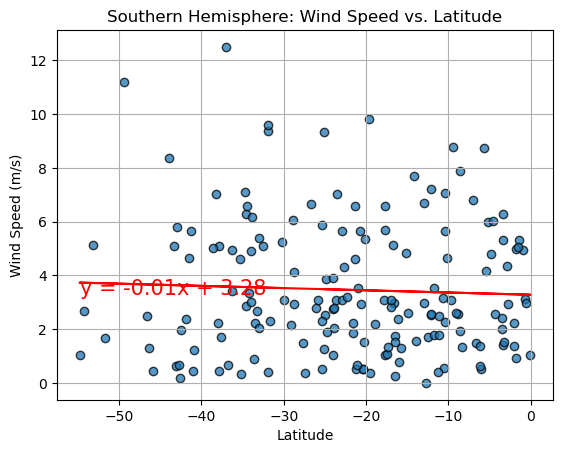

In [34]:
# Southern Hemisphere

plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       "Southern Hemisphere: Wind Speed vs. Latitude",
                       "Latitude", "Wind Speed (m/s)",
                       save_path=os.path.join(output_dir, "SH_WindSpeed_vs_Latitude.png"))


**Discussion about the linear relationship:** The linear regression analysis of wind speed vs. latitude for both hemispheres suggests that there is no strong linear relationship between these variables. The R-values likely indicate weak correlations, meaning latitude alone is not a strong predictor of wind speed levels. Other factors, such as geographical features, local climate conditions, and atmospheric patterns, likely play more significant roles in determining wind speed levels. This analysis highlights the complexity of climatic variables and the need to consider multiple factors when studying weather patterns and their relationships.